In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

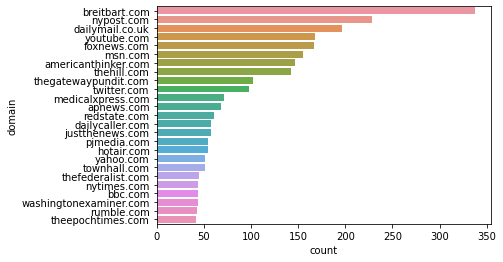

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

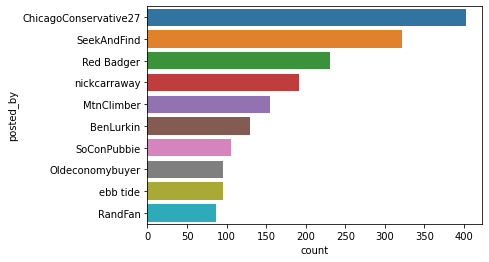

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    MtnClimber                74      1   
                       Red Badger                 1      1   
                       SeekAndFind               53      1   
                       ebb tide                   1      1   
apnews.com             Red Badger                 1      1   
                       ebb tide                   1      1   
                       ChicagoConservative27      1      1   
                       Oldeconomybuyer           27      1   
                       RandFan                    1      1   
bbc.com                SeekAndFind                1      1   
                       BenLurkin                 18      1   
                       nickcarraway               8      1   
breitbart.com          Red Badger                 1      1   
                       ebb tide                   1      1   
                       ChicagoConservative27    243      1   
                       SoConPubbie               27      1   
dailycaller.com        Red Badger                16      1   
                       SeekAndFind                1      1   
dailymail.co.uk        Red Badger                 6      1   
                       ebb tide                   1      1   
                       RandFan                    1      1   
                       nickcarraway               3      1   
                       SoConPubbie                1      1   
foxnews.com            MtnClimber                 1      1   
                       Red Badger                 1      1   
                       ebb tide                   1      1   
                       ChicagoConservative27     10      1   
                       Oldeconomybuyer            4      1   
                       RandFan                    2      1   
                       BenLurkin                  5      1   
                       nickcarraway               5      1   
hotair.com             MtnClimber                 1      1   
                       SeekAndFind               41      1   
justthenews.com        Red Badger                 4      1   
                       SeekAndFind                1      1   
                       SoConPubbie                2      1   
msn.com                Red Badger                 2      1   
                       SeekAndFind                2      1   
                       ebb tide                   1      1   
                       Oldeconomybuyer            3      1   
                       BenLurkin                  1      1   
                       nickcarraway               2      1   
nypost.com             MtnClimber                 1      1   
                       SeekAndFind                1      1   
                       ChicagoConservative27     34      1   
                       Oldeconomybuyer            5      1   
                       RandFan                    2      1   
                       BenLurkin                 53      1   
                       nickcarraway              36      1   
                       SoConPubbie                1      1   
nytimes.com            ChicagoConservative27      1      1   
                       RandFan                    2      1   
pjmedia.com            SeekAndFind               33      1   
                       SoConPubbie                1      1   
redstate.com           Red Badger                 2      1   
                       SeekAndFind               45      1   
rumble.com             RandFan                    1      1   
theepochtimes.com      Red Badger                 2      1   
                       SeekAndFind                6      1   
                       SoConPubbie                1      1   
thefederalist.com      Red Badger                 2      1   
                       SeekAndFind               18      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"LIVE! From the D.C.Swamp, It's FRIDAY NIGHT! The Election of The Speaker of the U.S. House of Representatives: Day IV, The Night Cap-Round 14.",2023-01-07 05:24:07,568.0
Looks like the Bills Player died on the Field of DIED SUDDENLY,2023-01-03 04:34:07,251.0
Damar Hamlin collapses on field; Bills-Bengals temporarily suspended,2023-01-03 07:03:12,233.0
"Harley-Davidson Will Go All-Electric, Says CEO",2023-01-19 19:56:34,226.0
Alec Baldwin Will Be Charged With Involuntary Manslaughter in ‘Rust’ Killing,2023-01-19 19:17:39,162.0
"BREAKING NEWS: Buffalo Bills safety Damar Hamlin, 24, given CPR after collapsing on the field in shocking scenes during the first quarter against Cincinnati Bengals",2023-01-03 07:03:12,155.0
